## HTTP Code
- https://zh.wikipedia.org/wiki/HTTP%E7%8A%B6%E6%80%81%E7%A0%81

## GET

In [1]:
import requests
res = requests.get('https://tw.appledaily.com/new/realtime')
res

<Response [200]>

In [5]:
type(res)

requests.models.Response

In [3]:
#res.text

## POST

In [4]:
url = 'https://www.thsrc.com.tw/tw/TimeTable/Search'

payload = {
'StartStationName':  '台北站',
'EndStationName':  '嘉義站',
'SearchType': 'S',
'StartStation': '977abb69-413a-4ccf-a109-0272c24fd490',
'EndStation': '60831846-f0e4-47f6-9b5b-46323ebdcef7',
'DepartueSearchDate': '2018/09/21',
'DepartueSearchTime': '08:30'    
    
}


res = requests.post(url, data = payload)
res

<Response [200]>

In [6]:
#res.text

## Parse Web Page

In [4]:
from bs4 import BeautifulSoup 
html_sample = ''' 
<html> 
 <body> 
 <h1 id="title">Hello World</h1> 
 <a href="#" class="link">This is link1</a> 
 <a href="# link2" class="link">This is link2</a> 
 </body> 
 </html>'''

soup = BeautifulSoup(html_sample, 'lxml')
print(soup.text)




Hello World
This is link1
This is link2




In [6]:
type(soup)

bs4.BeautifulSoup

In [7]:
soup.select_one('h1')

<h1 id="title">Hello World</h1>

In [8]:
soup.select_one('h1').text

'Hello World'

In [9]:
soup.select_one('a')

<a class="link" href="#">This is link1</a>

In [10]:
soup.select('a')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

## Based on CSS 

In [13]:
# id => #
soup.select('#title')

[<h1 id="title">Hello World</h1>]

In [14]:
# class => .
soup.select('.link')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [15]:
soup.select('h1#title')

[<h1 id="title">Hello World</h1>]

In [16]:
soup.select('body h1')

[<h1 id="title">Hello World</h1>]

In [17]:
soup.select('body h1#title')

[<h1 id="title">Hello World</h1>]

In [19]:
alinks = soup.select('a')
for link in alinks:
    print(link.text)

This is link1
This is link2


In [20]:
alinks = soup.select('a')
for link in alinks:
    print(link['href'])

#
# link2


## 蘋果爬蟲

In [21]:
import requests
res = requests.get('https://tw.appledaily.com/new/realtime')

In [22]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [26]:
# li and class = rtddt
#soup.select('li.rtddt')

# li and class = rtddt and class = hsv
#soup.select('li.rtddt.hsv')

# li and class = rtddt and below a
#soup.select('li.rtddt a')

In [41]:
# soup.select('li.rtddt a')
for news in soup.select('.rtddt a'):
    #print(news)
    #print(news.select_one('h1'))
    #print(news.select('h1'))
    title = news.select_one('h1').text
    category = news.select_one('h2').text
    dt = news.select_one('time').text
    link = news.get('href')
    print(title, dt, category, link)
    print('==================================')

花蓮開出首張搜救罰單　6登山客均攤92萬...(62623) 15:30 社會 https://tw.news.appledaily.com/local/realtime/20180919/1432625/
先潑漆再擺寶蓮燈　「油漆哥」恐嚇不二家挨...(67958) 15:30 社會 https://tw.news.appledaily.com/local/realtime/20180919/1432457/
AV女優自認遇真愛　被變態富二代活活玩死(55074) 15:30 國際 https://tw.news.appledaily.com/international/realtime/20180919/1432441/
女師駕車衝落15米山谷　警消聽聲辨位搶救... 15:28 社會 https://tw.news.appledaily.com/local/realtime/20180919/1432768/
蘋果被破解！「台灣駭客天才」1元買502...(157597) 15:27 3C https://tw.lifestyle.appledaily.com/gadget/realtime/20180919/1432526/
​【管案】台大生抗告有信心成功　最壞打算...(1003) 15:25 生活 https://tw.news.appledaily.com/life/realtime/20180919/1432558/
出面斥假訊息流竄　謝長廷：壓力與批判讓蘇...(14422) 15:22 政治 https://tw.news.appledaily.com/politics/realtime/20180919/1432569/
【獨家回應】「太精彩！」張鈞甯被爆抓姦男...(341007) 15:21 娛樂 https://tw.entertainment.appledaily.com/realtime/20180919/1432455/
Google One即將登台　100GB... 15:21 財經 https://tw.finance.appledaily.com/realtime/20180919/1432778/
永和分屍美籍兇嫌否認犯案　遭收押禁見 15:20 社會 https://tw.news.appledaily.com/local

## LTN

In [42]:
import requests
res = requests.get('http://news.ltn.com.tw/list/breakingnews')

In [44]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [58]:
for news in soup.select('.imm li'):
    #print(news)
    #print(news.select_one('.ph').get('data-desc'))
    #print(news.select_one('.tit').get('data-desc'))
    title = news.select_one('p').text.strip()
    link  = news.select_one('a').get('href')
    dt    = news.select_one('span').text
    print(title, link, dt)
    print('======================')

因為一首歌酸民崩潰脫粉 青峰洩黑暗心情 http://ent.ltn.com.tw/news/breakingnews/2556035 16:30
陳水扁擔任姚文智市政顧問 丁守中：趕快回到監獄去 http://news.ltn.com.tw/news/politics/breakingnews/2555956 16:28
赴警局受5小時調查  具荷拉態度放軟「想原諒」 http://ent.ltn.com.tw/news/breakingnews/2556017 16:28
國銀首例 上海商銀完成全國首筆金融區塊鏈函證回覆 http://news.ltn.com.tw/news/business/breakingnews/2556032 16:28
日月潭泳渡剛落幕... 網友驚見外國男子下水猛游 http://news.ltn.com.tw/news/life/breakingnews/2555981 16:26
勞退加上自提每月可領1.9萬 3成勞工不知道 http://news.ltn.com.tw/news/business/breakingnews/2556022 16:25
床邊抓姦分手男友 張鈞甯曬「情侣照」回應 http://ent.ltn.com.tw/news/breakingnews/2555998 16:24
擁大量槍彈剛交保 他手槍上膛插腰際被警飛撲奪下 http://news.ltn.com.tw/news/society/breakingnews/2555917 16:24
文在寅很忙！明與金正恩攀長白山   週日赴美見川普 http://news.ltn.com.tw/news/world/breakingnews/2555946 16:24
《如懿傳》洞房花燭 周迅這句話讓霍建華酥麻了！ http://ent.ltn.com.tw/news/breakingnews/2555996 16:24
中國持有近半股份 委內瑞拉總統出售石油公司Sinovensa http://news.ltn.com.tw/news/business/breakingnews/2555954 16:23
高雄綠營要求為假民調向市民道歉 韓國瑜這樣說… http://news.ltn.com.tw/news/politics/breakingnews/25

## 抓取內容頁

In [59]:
import requests
res = requests.get('https://tw.news.appledaily.com/local/realtime/20180919/1432625/')

In [61]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [63]:
soup.select_one('h1')

<h1>花蓮開出首張搜救罰單　6登山客均攤92萬直升機出勤費</h1>

In [65]:
soup.select('h1')[0]

<h1>花蓮開出首張搜救罰單　6登山客均攤92萬直升機出勤費</h1>

In [67]:
print(soup.select_one('h1').text)

花蓮開出首張搜救罰單　6登山客均攤92萬直升機出勤費


In [70]:
soup.select_one('.ndArticle_margin p').text.split('出版時間')[0]

'花蓮縣消防局上周四開出全國首張搜救直昇機搜救費用92萬元，向爬黑山（未依申請路線）闖入未開放路段登山，而發生意外的登山隊伍請求支付搜救費用，該件有7名登山客入山，造成1人罹難，除死者其他同行6名登山客需平均每人被要求付出15萬3763元的搜救費用，落實使用者付費原則。\xa0花蓮縣消防局副局長吳兆遠指出，「這是全國首張違法登山搜救付費罰單」。去年6月14日公告「花蓮縣登山活動管理自治條例」，實施花蓮縣境內登山活動之管理及對違規者裁罰及搜救費用索取作業。\xa0今年2月27日接獲報案，由7名登山客所組成的登山隊伍，因行經管制山域八通關日治越道線馬沙布駐在所附近，其中蔡姓隊友失足滑落邊坡罹難，經相關單位搜救，並由內政部空中勤務總隊派遣航空器吊掛遺體下山。\xa0該登山隊伍雖依規定向內政部警政署及玉山國家公園提出入園（山）申請，卻未依原申請路線進行登山活動，且進入未開放山域步道致發生不幸事件，因此上周提報花蓮縣政府開出每人新台幣6000元罰單；另發函請空中勤務總隊估算，包含航空器相關油料及耗材等搜救費用計支出為92萬2578元。\xa0消防局依據自治條例第14條第1項規定：「於本府公告之管制山域從事登山活動遭受登山事故，由本府進行搜救者，本府得以書面命其支付搜救費用。」吳兆遠說，搭機費用以每小時19萬4727元(工時費、航材、燃料)為計算，費時4時45分，因此需負擔92萬2578元。本周一正式由花蓮縣政府發函，針對其他6名登山客要求每人繳納平均15萬3763元搜救費用，於收文後一個月內繳納完畢，若超過期限，將送往法務部行政執行處執行，若對於行政處分內容不服者，也可依規定提出訴願。\xa0花蓮縣消防局長林文瑞呼籲社會大眾說，進入公告管制山域登山應有完善行前訓練、路線規劃並由合格領隊帶隊，同時應依法申請所需許可文件與辦理登山綜合保險、備妥可供緊急聯絡通訊、定位器材及足夠的電源供應器，並依計畫路線行進，不可擅闖未經開放路段，以免發生危險浪費社會資源。（突發中心李光濱／花蓮報導）'

In [81]:
soup.select_one('.ndArticle_creat').text.split('：')[1]

'2018/09/19 16:33'

In [82]:
dt = soup.select_one('.ndArticle_creat').text.split('：')[1]
type(dt)

In [85]:
from datetime import datetime
datetime.strptime(dt, '%Y/%m/%d %H:%M')

datetime.datetime(2018, 9, 19, 16, 33)

In [86]:
view_cnt = soup.select_one('.ndArticle_view').text
int(view_cnt)

86825

In [77]:
soup.select('.ndgTag .current')[0].text

'社會'

In [79]:
soup.select('.ndgTag .current')[0].text

'社會'

In [90]:
def pageDetail(url):
    ret     = {}
    res     = requests.get(url)  
    soup    = BeautifulSoup(res.text, 'lxml')
    ret['title']    = soup.select_one('h1').text
    ret['content']  = soup.select_one('.ndArticle_margin p').text.split('出版時間')[0]
    dt = soup.select_one('.ndArticle_creat').text.split('：')[1]
    ret['dt']       = datetime.strptime(dt, '%Y/%m/%d %H:%M')
    ret['view_cnt'] = int(soup.select_one('.ndArticle_view').text)
    ret['category'] = soup.select('.ndgTag .current')[0].text
    return ret

In [91]:
pageDetail('https://tw.news.appledaily.com/local/realtime/20180919/1432625/')

{'category': '社會',
 'content': '花蓮縣消防局上周四開出全國首張搜救直昇機搜救費用92萬元，向爬黑山（未依申請路線）闖入未開放路段登山，而發生意外的登山隊伍請求支付搜救費用，該件有7名登山客入山，造成1人罹難，除死者其他同行6名登山客需平均每人被要求付出15萬3763元的搜救費用，落實使用者付費原則。\xa0花蓮縣消防局副局長吳兆遠指出，「這是全國首張違法登山搜救付費罰單」。去年6月14日公告「花蓮縣登山活動管理自治條例」，實施花蓮縣境內登山活動之管理及對違規者裁罰及搜救費用索取作業。\xa0今年2月27日接獲報案，由7名登山客所組成的登山隊伍，因行經管制山域八通關日治越道線馬沙布駐在所附近，其中蔡姓隊友失足滑落邊坡罹難，經相關單位搜救，並由內政部空中勤務總隊派遣航空器吊掛遺體下山。\xa0該登山隊伍雖依規定向內政部警政署及玉山國家公園提出入園（山）申請，卻未依原申請路線進行登山活動，且進入未開放山域步道致發生不幸事件，因此上周提報花蓮縣政府開出每人新台幣6000元罰單；另發函請空中勤務總隊估算，包含航空器相關油料及耗材等搜救費用計支出為92萬2578元。\xa0消防局依據自治條例第14條第1項規定：「於本府公告之管制山域從事登山活動遭受登山事故，由本府進行搜救者，本府得以書面命其支付搜救費用。」吳兆遠說，搭機費用以每小時19萬4727元(工時費、航材、燃料)為計算，費時4時45分，因此需負擔92萬2578元。本周一正式由花蓮縣政府發函，針對其他6名登山客要求每人繳納平均15萬3763元搜救費用，於收文後一個月內繳納完畢，若超過期限，將送往法務部行政執行處執行，若對於行政處分內容不服者，也可依規定提出訴願。\xa0花蓮縣消防局長林文瑞呼籲社會大眾說，進入公告管制山域登山應有完善行前訓練、路線規劃並由合格領隊帶隊，同時應依法申請所需許可文件與辦理登山綜合保險、備妥可供緊急聯絡通訊、定位器材及足夠的電源供應器，並依計畫路線行進，不可擅闖未經開放路段，以免發生危險浪費社會資源。（突發中心李光濱／花蓮報導）',
 'dt': datetime.datetime(2018, 9, 19, 16, 33),
 'title': '花蓮開出首張搜救罰單\u30006登山客均攤92萬直升機出勤費',
 'view_cnt': 92807}

In [92]:
pageDetail('https://tw.lifestyle.appledaily.com/gadget/realtime/20180919/1432526/')

{'category': '3C車市',
 'content': '曾因刪除臉書創辦人貼文等事蹟而聲名大噪的「台灣駭客天才」張啟元，這回竟然只花1元在Apple Pay買了502台iPhone！但詢問蘋果官方，對此並未做出回應。張啟元在《臉書》貼出購買截圖，可見他訂了500支iPhone 8 Plus 256GB和2支iPhone XS Max 512GB，總金額為1565萬5800元，但他卻發現只需要1元！「用1元去刷，居然過了，再試一次正常金額的，就沒成功了。」由於他上次也曾發生類似事件，讓他好奇「所以會不會像上次的SE一樣，真的把手機給寄過來了？這樣會有502台欸！」「蘋果仁」也在粉絲頁分享這段訊息，並好奇地寫下「不曉得蘋果會不會真的出貨。」結果不少網友紛紛酸張啟元「我覺得他只是第一次在Apple Store買東西收到認證而已，就誤以為自己成功了」、「我也有這1元啊，很稀奇嗎？隔兩天apple 就跟我收全額啦」、「人家第一次買Apple，我們就多寬容吧，再笑一個小時就好了！」沒想到釣出本尊親回！張啟元打臉地秀出Apple pay交易資料、卡號資料以及上次的SE出貨圖，「2016年8月30日那次的SE也是類似問題，但他真的出貨了」、「2016年8月回報漏洞的編號和信件截圖，那時的問題已修正，這次是另一個相似的問題」，但他也霸氣地說「放心好了！這次訂單我不會讓他們出貨，已經取消了。」並表示上回收到SE，主包裝都沒拆開，拍照後也全退回去了。張啟元2013年無意間發現臉書漏洞，可在幾秒內迅速刪光別人貼文，向臉書反映卻未受重視，便動手刪了薩克柏貼文而聲名大噪，之後又因提交漏洞，獲臉書提供1千美元獎金（約3萬多元台幣），2015年又幫忙自殺過世藝人楊又穎的家屬，解鎖她生前所用手機，再度被報導，但後續發現統聯和7-ELEVEn購票系統漏洞，可1元買到車票或遊樂園門票，引發各界正反兩面評價。（即時新聞中心／綜合報導）出版1058更新1541(新增配音影片)想知道更多，一定要看……張啟元「以駭止駭」！曾有妹私訊「願肉體換新台幣」曾窮到剩50元！張啟元：我不是駭客天才，只是愛打破規則看了這則新聞的人，也看了……台式速食外國人也愛\u3000南霸天丹丹漢堡！登航空旅遊雜誌小嫻離婚2月吐心情\u3000想對「另一半」說...\u200b雙胞胎懷孕被酸問「姐妹丼？」\u3000她痛斥「

## 完整爬蟲流程 (一)

In [110]:
def pageDetail(url):
    ret     = {}
    res     = requests.get(url)  
    soup    = BeautifulSoup(res.text, 'lxml')
    ret['title']    = soup.select_one('h1').text
    ret['content']  = soup.select_one('.ndArticle_margin p').text.split('出版時間')[0]
    dt = soup.select_one('.ndArticle_creat').text.split('：')[1]
    ret['dt']       = datetime.strptime(dt, '%Y/%m/%d %H:%M')
    if soup.select_one('.ndArticle_view'):
        ret['view_cnt'] = int(soup.select_one('.ndArticle_view').text)
    ret['category'] = soup.select('.ndgTag .current')[0].text
    return ret

In [111]:
import requests
res = requests.get('https://tw.appledaily.com/new/realtime')

In [112]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [113]:
news = []
for rec in soup.select('.rtddt a'):
    link = rec.get('href')
    print(link)
    ret  = pageDetail(link)
    news.append(ret)
    

https://tw.finance.appledaily.com/realtime/20180919/1432463/
https://tw.news.appledaily.com/life/realtime/20180919/1432912/
https://tw.news.appledaily.com/international/realtime/20180919/1432902/
https://tw.news.appledaily.com/life/realtime/20180919/1432873/
https://tw.news.appledaily.com/politics/realtime/20180919/1432856/
https://tw.news.appledaily.com/life/realtime/20180919/1432908/
https://tw.finance.appledaily.com/realtime/20180919/1432911/
https://tw.news.appledaily.com/local/realtime/20180919/1432895/
https://tw.news.appledaily.com/life/realtime/20180919/1432896/
https://tw.entertainment.appledaily.com/realtime/20180919/1432767/
https://tw.news.appledaily.com/politics/realtime/20180919/1432891/
https://tw.news.appledaily.com/life/realtime/20180919/1432459/
https://tw.news.appledaily.com/life/realtime/20180919/1432518/
https://tw.finance.appledaily.com/realtime/20180919/1432892/
https://tw.sports.appledaily.com/realtime/20180919/1432898/
https://tw.news.appledaily.com/local/realt

In [114]:
len(news)

30

In [115]:
news[0]

{'category': '財經地產',
 'content': '股王大立光（3008）昨天除外資因蘋果iXS買氣疑慮，降評下修獲利，重挫425元，吞下跌停板。但事實上，依據證交所資料顯示，9月18日當天大立光創辦人林耀英、董事長林恩舟，以及執行長林恩平等董事，申報轉讓6090張持股，佔家族持股比近4成，市值達235億元，且是以洽特定人方式，受讓人均為茂鈺紀念股份有限公司籌備處代表人林恩平。在昨天吞下跌停後，大立光今天股價以3865元開高，在平盤上震盪，早盤漲幅近1%。大立光發言體系回應表示，茂鈺紀念股份有限公司同樣為董事長、執行長持有之公司，目前還沒有成立，預計10月完成，其作用在於為永續持有大立光股票。按公開發行公司內部人股權申報規定來看，在申報日3天後，得以向符合條件特定人轉讓，大立光這次轉讓預計在9月21日起可以開始轉讓，且須在1個月內完成。根據公開觀測站資料，大立光董事長林恩舟持股4111張，執行長林恩平持股6019張，父親林耀英有2526張，林恩舟夫人也有3680張，合計16336張，這次申報轉讓張數佔家族比重達37%。綜觀台灣上市櫃公司，大立光大股東過往都用自然人持股方式，且大立光創始的4大家族，包括林耀英、林恩舟、林恩平，陳世卿、蔣翠英、梁中仁和謝銘原都是個人持股，4大家族均講好不賣股，讓股權相當穩定。這次申報轉讓是繼2007年後，相隔了11年，格外引發注意。針對林恩平家族將市值約235億元股票轉讓給法人公司，會計師分析，此次大立光將股票轉給投資公司名下，可能有兩個目的，第一為省稅，第二是為家族傳承。會計師表示，很多大老闆都會把股票轉給投資公司，甚至國外的投資公司，第一個原因就是省稅。大立光股價高、會賺錢，每年都分配不少股利，依據稅改後的規定，這些大老闆個人持有若股利，大多按28%稅率分開計算稅額、合併報繳。但若是投資公司拿到股利，就可以暫時免稅，直到該投資公司再往下發放股利，才需要課稅。而第二個原因可能是家族傳承，會計師表示，有了這個投資公司，若未來把股權轉到信託下面，對受託權跟經營權的規劃有彈性跟空間，例如把投資公司股權放在信託，可以約定未來由誰決定、或透過什麼機制才能行使股東權利。（陳俐妏、劉懿慧／台北報導）更新：新增會計師看法、動新聞出版:08:10更新:15:15想知道更多，一定要看……【股王轉讓持股】會計師：家族傳承和省稅兩大目的【股王

In [103]:
url = 'https://tw.entertainment.appledaily.com/realtime/20180919/1432767/'
res     = requests.get(url)  
soup    = BeautifulSoup(res.text, 'lxml')
print(soup.select_one('.ndArticle_view'))

None


In [104]:
a = 3
if a > 2:
    print('yes')

yes


In [105]:
a > 2

True

In [106]:
if True:
    print('yes')

yes


In [109]:
if a:
    print('yes')

yes


In [107]:
if False:
    print('yes')

In [108]:
if None:
    print('yes')

## 完整爬蟲流程 (二)

In [118]:
import requests
from datetime import datetime
from bs4 import BeautifulSoup

In [119]:
def pageDetail(url):
    ret     = {}
    res     = requests.get(url)  
    soup    = BeautifulSoup(res.text, 'lxml')
    ret['title']    = soup.select_one('h1').text
    ret['content']  = soup.select_one('.ndArticle_margin p').text.split('出版時間')[0]
    dt = soup.select_one('.ndArticle_creat').text.split('：')[1]
    ret['dt']       = datetime.strptime(dt, '%Y/%m/%d %H:%M')
    if soup.select_one('.ndArticle_view'):
        ret['view_cnt'] = int(soup.select_one('.ndArticle_view').text)
    ret['category'] = soup.select('.ndgTag .current')[0].text
    return ret

In [120]:
news_url = 'https://tw.appledaily.com/new/realtime/{}'

news = []
for i in range(1, 4):
    res = requests.get(news_url.format(i))
    soup = BeautifulSoup(res.text, 'lxml')
    for rec in soup.select('.rtddt a'):
        link = rec.get('href')
        ret  = pageDetail(link)
        news.append(ret)
    

In [121]:
len(news)

90

In [125]:
import pandas
newsdf = pandas.DataFrame(news)
newsdf.head()

,category,content,dt,title,view_cnt
0,女生,百貨周年慶常常大打折扣戰，不過法國有機保養品牌Melvita推出的禮盒雖僅6折，但因為內容太...,2018-09-19 17:50:00,保養品牌熱推環保風 限定版禮盒有竹吸管,5910.0
1,體育,澳門非凡12今上演台灣內戰戲碼，SBL(Super Basketball League，超級...,2018-09-19 17:50:00,非凡12台灣內戰呂政儒贏面子 林志傑贏裡子,NaN
2,女生,五、六年級生一定對仙桃牌通乳丸廣告很有印象！在1960年代就挑戰尺度，大膽啟用豐滿的歐美女模...,2018-09-19 17:49:00,【通乳始祖】新IG美照登場,1298.0
3,生活,「這裡好好玩喔！」「奇幻精靈是從月亮來的嗎？」嘉楠集團招待來自弱勢家庭的孩子們，到中南部唯一...,2018-09-19 17:49:00,飯店附設親子遊樂區開幕 邀弱勢孩童提前歡度中秋,NaN
4,社會,花蓮縣消防局上周四開出全國首張搜救直昇機搜救費用92萬元，向爬黑山（未依申請路線）闖入未開放...,2018-09-19 17:48:00,花蓮開出首張搜救罰單 6登山客均攤92萬直升機出勤費,103128.0


In [128]:
newsdf.sort_values('view_cnt', ascending=False).head()

,category,content,dt,title,view_cnt
4,社會,花蓮縣消防局上周四開出全國首張搜救直昇機搜救費用92萬元，向爬黑山（未依申請路線）闖入未開放...,2018-09-19 17:48:00,花蓮開出首張搜救罰單 6登山客均攤92萬直升機出勤費,103128.0
59,娛樂時尚,「勇伯」陳松勇講話還是這麼直接！今日出刊的《蘋果》報導，即將在下月8日補辦婚禮的81歲製作人...,2018-09-19 16:52:00,捏冷汗！陳松勇狠酸周遊 「她老公每天考古」,88211.0
21,社會,（更新：不二家回應）彰化排隊蛋黃酥名店不二家14日才遭許姓男子闖進店內潑紅漆，許男落網後稱買...,2018-09-19 17:31:00,「油漆哥」到案！先潑漆再擺寶蓮燈 恐嚇不二家挨告,83389.0
84,政治,總統府首位女性武官陳月芳（46歲）遭媒體爆料，在今年8月7日及本月11日，被直擊與總統貼身隨...,2018-09-19 16:25:00,總統特勤偷情下場慘 女武官調離現職、男隨扈調回憲兵部,78716.0
19,政治,距離年底選舉只剩65天，《蘋果日報》委託世新大學調查選民投票意向，根據最新民調結果，年底高雄...,2018-09-19 17:32:00,【蘋果民調1】高雄戰況激烈！ 陳其邁33.8%小勝韓國瑜31.2%,69186.0


In [131]:
# SELECT category, count(*) FROM newsdf GROUP BY category
newsdf.groupby('category')['title'].count().sort_values(ascending=False)

category
財經地產    17
生活      17
社會      16
政治      11
體育       6
娛樂時尚     6
壹週刊      6
國際       5
女生       3
論壇       2
吃喝玩樂     1
Name: title, dtype: int64

In [132]:
# SELECT category, sum(view_cnt) FROM newsdf GROUP BY category
newsdf.groupby('category')['view_cnt'].sum().sort_values(ascending=False)

category
社會      242386.0
政治      177790.0
財經地產    167466.0
娛樂時尚    122076.0
體育       45964.0
生活       44549.0
國際       28615.0
女生        9000.0
吃喝玩樂      3702.0
壹週刊       2573.0
論壇        1125.0
Name: view_cnt, dtype: float64

In [133]:
# SELECT category, AVG(view_cnt) FROM newsdf GROUP BY category
newsdf.groupby('category')['view_cnt'].mean().sort_values(ascending=False)

category
娛樂時尚    20346.000000
政治      16162.727273
社會      16159.066667
財經地產    10466.625000
體育       9192.800000
國際       5723.000000
吃喝玩樂     3702.000000
生活       3182.071429
女生       3000.000000
論壇        562.500000
壹週刊       514.600000
Name: view_cnt, dtype: float64

In [136]:
newsdf[newsdf.groupby('category')['view_cnt'].transform(max) == newsdf['view_cnt']]

,category,content,dt,title,view_cnt
0,女生,百貨周年慶常常大打折扣戰，不過法國有機保養品牌Melvita推出的禮盒雖僅6折，但因為內容太...,2018-09-19 17:50:00,保養品牌熱推環保風 限定版禮盒有竹吸管,5910.0
4,社會,花蓮縣消防局上周四開出全國首張搜救直昇機搜救費用92萬元，向爬黑山（未依申請路線）闖入未開放...,2018-09-19 17:48:00,花蓮開出首張搜救罰單 6登山客均攤92萬直升機出勤費,103128.0
16,吃喝玩樂,(更新：新增動新聞)外食市場蓬勃發展，不論是親朋好友簡單聚會，或是要享受個人獨處時光，都帶動...,2018-09-19 17:34:00,星巴克推新套餐最高320元 可頌10年賣1700萬份,3702.0
24,生活,（新增食藥署說法）《蘋果》日前踢爆亞培安素產品疑似變質，更擴及其他產品，全台預防性下架亞培6...,2018-09-19 17:30:00,亞培6產品暫查無異常 食藥署：會再找專家檢視,11677.0
59,娛樂時尚,「勇伯」陳松勇講話還是這麼直接！今日出刊的《蘋果》報導，即將在下月8日補辦婚禮的81歲製作人...,2018-09-19 16:52:00,捏冷汗！陳松勇狠酸周遊 「她老公每天考古」,88211.0
65,財經地產,美中貿易戰愈演愈烈，美國總統川普甚至揚言不排除再祭出下一波的2760億美元課稅清單，台灣製造...,2018-09-19 16:47:00,【貿易戰躲回台1】台商搶地設廠 工業區「一地難求」價狂飆,61014.0
67,體育,16：46（新增影片）總獎金100萬美元、「世界巡迴超級1000」的中國羽球公開賽，今天進行...,2018-09-19 16:46:00,球后戴資穎大爆冷門 中國羽球公開賽首輪遭淘汰,43410.0
72,國際,體罰殺人！中國湖南省邵陽市一名張姓高中一年級學生，日前因為午休時講話被謝姓導師發現，被處罰從...,2018-09-19 16:39:00,午休講話被罰蛙跳 高一生五孔流血斃命,19957.0
79,論壇,奧譜 . 卡思 ／醫師 關於居禮夫人正名事件，波蘭台北辦事處：「歐洲都使用全名，讓大眾認清她...,2018-09-19 16:30:00,「居禮夫人」改名爭議背後的「國族議題」,1018.0
80,壹週刊,看本篇完整版內容，請點以下連結：彭于晏全裸5秒害人家溼了！日夜操肌全為這女人https://...,2018-09-19 16:30:00,【壹週刊】彭于晏全裸5秒害人家溼了！日夜操肌全為這女人,1708.0


Populating the interactive namespace from numpy and matplotlib


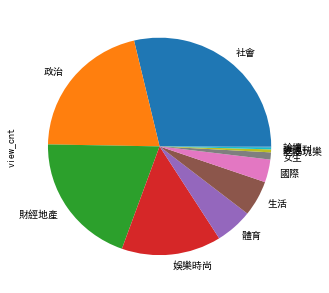

In [142]:
%pylab inline
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['simhei']
# SELECT category, sum(view_cnt) FROM newsdf GROUP BY category
newsdf.groupby('category')['view_cnt'].sum().sort_values(ascending=False).plot(kind = 'pie', figsize = [5,5])

Populating the interactive namespace from numpy and matplotlib


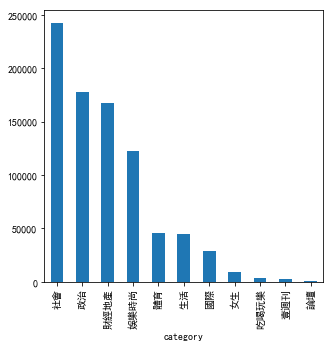

In [143]:
%pylab inline
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['simhei']
# SELECT category, sum(view_cnt) FROM newsdf GROUP BY category
newsdf.groupby('category')['view_cnt'].sum().sort_values(ascending=False).plot(kind = 'bar', figsize = [5,5])

Populating the interactive namespace from numpy and matplotlib


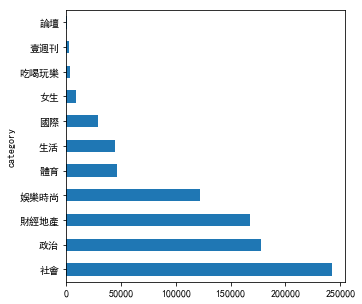

In [147]:
%pylab inline
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['simhei']
# SELECT category, sum(view_cnt) FROM newsdf GROUP BY category
newsdf.groupby('category')['view_cnt'].sum().sort_values(ascending=False).plot(kind = 'barh', figsize = [5,5])

In [148]:
newsdf.to_excel('applenews.xlsx')

## 591

In [149]:
import requests
res = requests.get('https://sale.591.com.tw/home/search/list?type=2&&shType=list&regionid=1&section=5&firstRow=60&totalRows=1865&timestamp=1537352534207')
res

<Response [404]>

In [151]:
import requests
headers = {  
   'User-Agent':'qoo' 
}
res = requests.get('https://www.largitdata.com', headers = headers)
res

<Response [200]>

In [152]:
import requests
headers = {
  'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/68.0.3440.106 Safari/537.36'  
}
res = requests.get('https://sale.591.com.tw/home/search/list?type=2&&shType=list&regionid=1&section=5&firstRow=60&totalRows=1865&timestamp=1537352534207', headers = headers)
res

<Response [200]>

In [155]:
jd = res.json()

In [158]:

housedf = pandas.DataFrame(jd['data']['house_list'])

In [170]:
housedf.head(3)

,address,area,browsenum,cartmodel,carttype,community_link,community_name,delivery,down_price_percent,fci_pai,...,saletype,section_name,shape_name,showhouseage,showprice,tag,title,type,unit_price,unitprice
0,通化街,57.60,227,,,,,,NaN,,...,0,大安區,電梯大樓,38年,"4,750",[有陽台],近遠企商圈/六張犂捷運站電梯用置產屋,2,82.47萬/坪,82.47
1,延吉街241巷,38.72,544,,,,光信公園華廈,,NaN,,...,0,大安區,電梯大樓,35年,"3,580","[明星學區, 有陽台, 低公設]",獨家!延吉正面公園綠蔭美景雙拼美廈可停車,2,92.46萬/坪,92.46
2,和平東路三段212巷,44.57,540,,,,友座臻璽,,NaN,,...,0,大安區,電梯大樓,9個月,"4,680","[含車位, 有陽台, 製震宅]",全新友座臻璽高樓大車位住商劉匡珉,2,97.15萬/坪,97.15


In [ ]:
#https://sale.591.com.tw/home/search/list?type=2&&shType=list&regionid=1&section=5&firstRow=60&totalRows=1865&timestamp=1537352534207
#https://sale.591.com.tw/home/search/list?type=2&#&shType=list&regionid=1&section=5&firstRow=90&totalRows=1865&timestamp=1537353245528

In [160]:
import requests
headers = {
  'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/68.0.3440.106 Safari/537.36'  
}
res = requests.get('https://sale.591.com.tw/home/search/list?type=2&&shType=list&regionid=1&section=5&firstRow=60&totalRows=1865', headers = headers)
res


<Response [200]>

In [175]:
import math, time
houseurl = 'https://sale.591.com.tw/home/search/list?type=2&&shType=list&regionid=1&section=5&firstRow={}&totalRows=1865'

houseary = [] 
for i in range(  0 , math.ceil(1865/30)  ): 
    res = requests.get(houseurl.format(i * 30), headers = headers)
    jd  = res.json()
    time.sleep(1)
    houseary.extend(jd['data']['house_list'])

In [176]:
len(houseary)

1869

In [178]:
import pandas
housedf = pandas.DataFrame(houseary)
housedf.head(3)

,address,area,browsenum,build_purpose,call_num,cartmodel,carttype,community_link,community_name,company,...,show_unitprice_unit,showarea,showhouseage,showprice,street_name,tag,title,type,unit_price,unitprice
0,NaN,43.00,0,華廈,14.0,NaN,NaN,NaN,NaN,富裔實業,...,萬元/坪,43坪,NaN,NaN,大安路一段206巷16號,"[預售屋, 住商用, 捷運宅, 明星學區, 近公園]",富裔Corner,8,NaN,155
1,仁愛路四段345巷,49.25,2625,NaN,NaN,,,,興雅別墅,NaN,...,NaN,NaN,40年,"4,978",NaN,[有陽台],仁愛延吉千萬裝潢美屋,2,101.08萬/坪,101.08
2,信義路四段,6.00,33,NaN,NaN,機械式,室內地下,,,NaN,...,NaN,NaN,,220,NaN,[],售信義通化路口稀有僅存黃金機械車位租可,2,36.67萬/坪,36.67


In [179]:
housedf.to_excel('house591.xlsx')

In [173]:
a = [1,2,3]
b = [4,5,6]
a.extend(b)
a

[1, 2, 3, 4, 5, 6]

In [180]:
import time
time.sleep(3)